# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [10]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url, verify=False)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.91, 即時現金賣出: 30.58


C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [16]:
for rate in rate_table:
    currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 去掉空白

    buy_rate = rate.find(name='td', attrs={'data-table':'本行現金買入'})
    sell_rate = rate.find(name='td', attrs={'data-table':'本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.string, sell_rate.string))


美金(USD)

即時現金買入: 29.91, 即時現金賣出: 30.58

港幣(HKD)

即時現金買入: 3.727, 即時現金賣出: 3.931

英鎊(GBP)

即時現金買入: 39.49, 即時現金賣出: 41.61

澳幣(AUD)

即時現金買入: 20.6, 即時現金賣出: 21.38

加拿大幣(CAD)

即時現金買入: 22.53, 即時現金賣出: 23.44

新加坡幣(SGD)

即時現金買入: 21.84, 即時現金賣出: 22.75

瑞士法郎(CHF)

即時現金買入: 30.01, 即時現金賣出: 31.21

日圓(JPY)

即時現金買入: 0.2672, 即時現金賣出: 0.28

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: 2.85, 即時現金賣出: 3.37

紐元(NZD)

即時現金買入: 19.59, 即時現金賣出: 20.44

泰幣(THB)

即時現金買入: 0.8792, 即時現金賣出: 1.0672

菲國比索(PHP)

即時現金買入: 0.5251, 即時現金賣出: 0.6581

印尼幣(IDR)

即時現金買入: 0.00183, 即時現金賣出: 0.00253

歐元(EUR)

即時現金買入: 33.03, 即時現金賣出: 34.37

韓元(KRW)

即時現金買入: 0.02411, 即時現金賣出: 0.02801

越南盾(VND)

即時現金買入: 0.00093, 即時現金賣出: 0.00143

馬來幣(MYR)

即時現金買入: 6.213, 即時現金賣出: 7.857

人民幣(CNY)

即時現金買入: 4.246, 即時現金賣出: 4.408


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)



美金(USD)

            buy_rate  sell_rate
date                           
2019/08/01    30.770     31.440
2019/08/02    30.975     31.645
2019/08/05    31.215     31.885
2019/08/06    31.090     31.760
2019/08/07    31.065     31.735
2019/08/08    30.955     31.625
2019/08/09    30.950     31.620
2019/08/12    31.000     31.670
2019/08/13    31.100     31.770
2019/08/14    31.000     31.670
2019/08/15    30.965     31.635
2019/08/16    30.960     31.630
2019/08/19    30.940     31.610
2019/08/20    30.995     31.665
2019/08/21    30.960     31.630
2019/08/22    30.975     31.645
2019/08/23    30.975     31.645
2019/08/26    31.010     31.680
2019/08/27    31.000     31.670
2019/08/28    31.015     31.685
2019/08/29    31.025     31.695
2019/08/30    30.990     31.660


<Figure size 720x576 with 0 Axes>

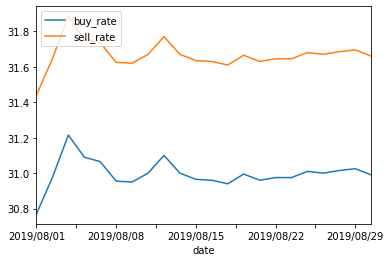

In [22]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url, verify=False)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url, verify=False)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
print(HistoryExchangeRate)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)



美金(USD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01    30.770     31.440
2019/08/02    30.975     31.645
2019/08/05    31.215     31.885
2019/08/06    31.090     31.760
2019/08/07    31.065     31.735
2019/08/08    30.955     31.625
2019/08/09    30.950     31.620
2019/08/12    31.000     31.670
2019/08/13    31.100     31.770
2019/08/14    31.000     31.670
2019/08/15    30.965     31.635
2019/08/16    30.960     31.630
2019/08/19    30.940     31.610
2019/08/20    30.995     31.665
2019/08/21    30.960     31.630
2019/08/22    30.975     31.645
2019/08/23    30.975     31.645
2019/08/26    31.010     31.680
2019/08/27    31.000     31.670
2019/08/28    31.015     31.685
2019/08/29    31.025     31.695
2019/08/30    30.990     31.660


<Figure size 720x576 with 0 Axes>

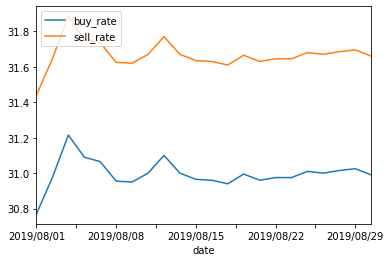


港幣(HKD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     3.826      4.030
2019/08/02     3.854      4.058
2019/08/05     3.880      4.084
2019/08/06     3.864      4.068
2019/08/07     3.857      4.061
2019/08/08     3.843      4.047
2019/08/09     3.841      4.045
2019/08/12     3.846      4.050
2019/08/13     3.858      4.062
2019/08/14     3.846      4.050
2019/08/15     3.843      4.047
2019/08/16     3.843      4.047
2019/08/19     3.839      4.043
2019/08/20     3.846      4.050
2019/08/21     3.842      4.046
2019/08/22     3.844      4.048
2019/08/23     3.845      4.049
2019/08/26     3.848      4.052
2019/08/27     3.846      4.050
2019/08/28     3.847      4.051
2019/08/29     3.849      4.053
2019/08/30     3.845      4.049


<Figure size 720x576 with 0 Axes>

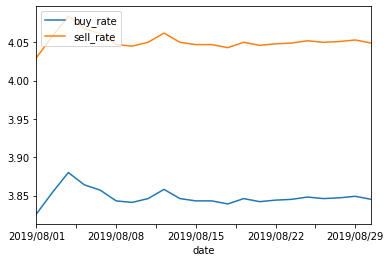


英鎊(GBP)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     36.55      38.67
2019/08/02     36.86      38.98
2019/08/05     37.09      39.21
2019/08/06     37.17      39.29
2019/08/07     37.08      39.20
2019/08/08     36.99      39.11
2019/08/09     36.84      38.96
2019/08/12     36.68      38.80
2019/08/13     36.80      38.92
2019/08/14     36.68      38.80
2019/08/15     36.68      38.80
2019/08/16     36.82      38.94
2019/08/19     36.84      38.96
2019/08/20     36.78      38.90
2019/08/21     36.86      38.98
2019/08/22     36.88      39.00
2019/08/23     37.09      39.21
2019/08/26     37.31      39.43
2019/08/27     37.28      39.40
2019/08/28     37.30      39.42
2019/08/29     37.12      39.24
2019/08/30     37.03      39.15


<Figure size 720x576 with 0 Axes>

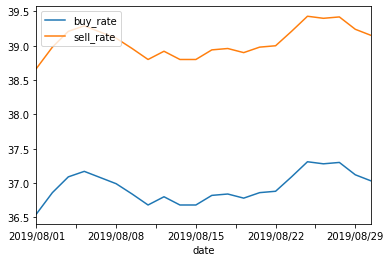


澳幣(AUD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     20.95      21.73
2019/08/02     20.97      21.75
2019/08/05     20.99      21.77
2019/08/06     21.01      21.79
2019/08/07     20.77      21.55
2019/08/08     20.85      21.63
2019/08/09     20.95      21.73
2019/08/12     20.89      21.67
2019/08/13     20.91      21.69
2019/08/14     20.90      21.68
2019/08/15     20.87      21.65
2019/08/16     20.87      21.65
2019/08/19     20.85      21.63
2019/08/20     20.90      21.68
2019/08/21     20.87      21.65
2019/08/22     20.87      21.65
2019/08/23     20.81      21.59
2019/08/26     20.82      21.60
2019/08/27     20.82      21.60
2019/08/28     20.80      21.58
2019/08/29     20.79      21.57
2019/08/30     20.71      21.49


<Figure size 720x576 with 0 Axes>

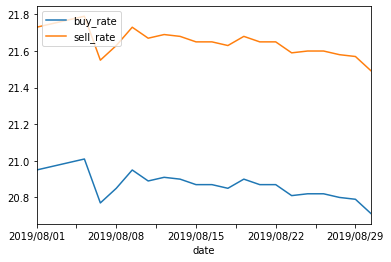


加拿大幣(CAD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     23.08      23.99
2019/08/02     23.24      24.15
2019/08/05     23.39      24.30
2019/08/06     23.37      24.28
2019/08/07     23.18      24.09
2019/08/08     23.10      24.01
2019/08/09     23.21      24.12
2019/08/12     23.24      24.15
2019/08/13     23.27      24.18
2019/08/14     23.22      24.13
2019/08/15     23.10      24.01
2019/08/16     23.07      23.98
2019/08/19     23.12      24.03
2019/08/20     23.07      23.98
2019/08/21     23.06      23.97
2019/08/22     23.12      24.03
2019/08/23     23.07      23.98
2019/08/26     23.11      24.02
2019/08/27     23.23      24.14
2019/08/28     23.11      24.02
2019/08/29     23.14      24.05
2019/08/30     23.09      24.00


<Figure size 720x576 with 0 Axes>

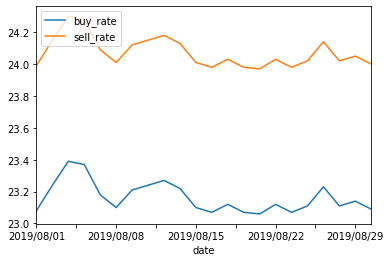


新加坡幣(SGD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     22.07      22.98
2019/08/02     22.23      23.14
2019/08/05     22.31      23.22
2019/08/06     22.22      23.13
2019/08/07     22.18      23.09
2019/08/08     22.11      23.02
2019/08/09     22.11      23.02
2019/08/12     22.05      22.96
2019/08/13     22.10      23.01
2019/08/14     22.08      22.99
2019/08/15     22.01      22.92
2019/08/16     22.02      22.93
2019/08/19     22.05      22.96
2019/08/20     22.07      22.98
2019/08/21     22.08      22.99
2019/08/22     22.08      22.99
2019/08/23     22.05      22.96
2019/08/26     22.07      22.98
2019/08/27     22.03      22.94
2019/08/28     22.04      22.95
2019/08/29     22.06      22.97
2019/08/30     22.03      22.94


<Figure size 720x576 with 0 Axes>

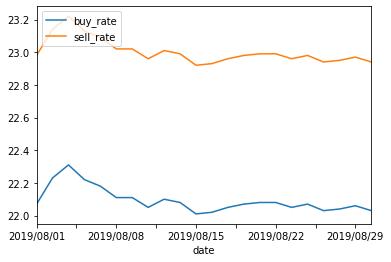


瑞士法郎(CHF)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     30.46      31.66
2019/08/02     31.02      32.22
2019/08/05     31.51      32.71
2019/08/06     31.53      32.73
2019/08/07     31.35      32.55
2019/08/08     31.35      32.55
2019/08/09     31.33      32.53
2019/08/12     31.38      32.58
2019/08/13     31.63      32.83
2019/08/14     31.40      32.60
2019/08/15     31.37      32.57
2019/08/16     31.21      32.41
2019/08/19     31.25      32.45
2019/08/20     31.21      32.41
2019/08/21     31.20      32.40
2019/08/22     31.10      32.30
2019/08/23     31.00      32.20
2019/08/26     31.33      32.53
2019/08/27     31.26      32.46
2019/08/28     31.17      32.37
2019/08/29     31.19      32.39
2019/08/30     30.91      32.11


<Figure size 720x576 with 0 Axes>

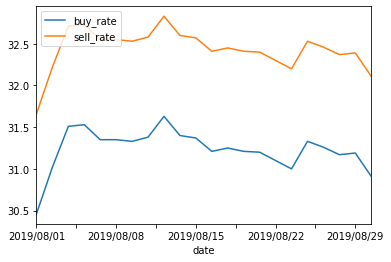


日圓(JPY)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01    0.2764     0.2892
2019/08/02    0.2842     0.2970
2019/08/05    0.2891     0.3019
2019/08/06    0.2869     0.2997
2019/08/07    0.2868     0.2996
2019/08/08    0.2861     0.2989
2019/08/09    0.2866     0.2994
2019/08/12    0.2884     0.3012
2019/08/13    0.2901     0.3029
2019/08/14    0.2858     0.2986
2019/08/15    0.2860     0.2988
2019/08/16    0.2861     0.2989
2019/08/19    0.2853     0.2981
2019/08/20    0.2856     0.2984
2019/08/21    0.2851     0.2979
2019/08/22    0.2855     0.2983
2019/08/23    0.2850     0.2978
2019/08/26    0.2878     0.3006
2019/08/27    0.2877     0.3005
2019/08/28    0.2879     0.3007
2019/08/29    0.2869     0.2997
2019/08/30    0.2854     0.2982


<Figure size 720x576 with 0 Axes>

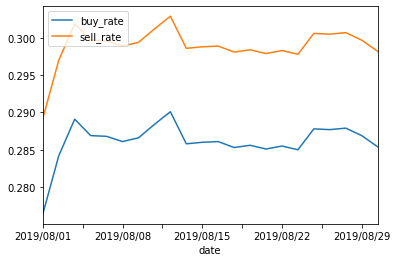


南非幣(ZAR)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01       0.0        0.0
2019/08/02       0.0        0.0
2019/08/05       0.0        0.0
2019/08/06       0.0        0.0
2019/08/07       0.0        0.0
2019/08/08       0.0        0.0
2019/08/09       0.0        0.0
2019/08/12       0.0        0.0
2019/08/13       0.0        0.0
2019/08/14       0.0        0.0
2019/08/15       0.0        0.0
2019/08/16       0.0        0.0
2019/08/19       0.0        0.0
2019/08/20       0.0        0.0
2019/08/21       0.0        0.0
2019/08/22       0.0        0.0
2019/08/23       0.0        0.0
2019/08/26       0.0        0.0
2019/08/27       0.0        0.0
2019/08/28       0.0        0.0
2019/08/29       0.0        0.0
2019/08/30       0.0        0.0


<Figure size 720x576 with 0 Axes>

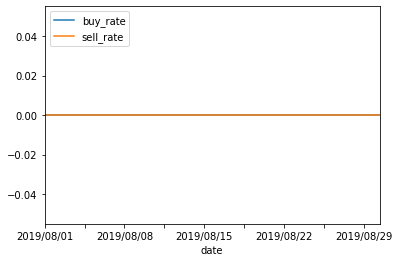


瑞典幣(SEK)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01      2.83       3.35
2019/08/02      2.87       3.39
2019/08/05      2.89       3.41
2019/08/06      2.90       3.42
2019/08/07      2.90       3.42
2019/08/08      2.88       3.40
2019/08/09      2.89       3.41
2019/08/12      2.89       3.41
2019/08/13      2.90       3.42
2019/08/14      2.90       3.42
2019/08/15      2.88       3.40
2019/08/16      2.86       3.38
2019/08/19      2.86       3.38
2019/08/20      2.85       3.37
2019/08/21      2.86       3.38
2019/08/22      2.87       3.39
2019/08/23      2.86       3.38
2019/08/26      2.87       3.39
2019/08/27      2.87       3.39
2019/08/28      2.86       3.38
2019/08/29      2.85       3.37
2019/08/30      2.82       3.34


<Figure size 720x576 with 0 Axes>

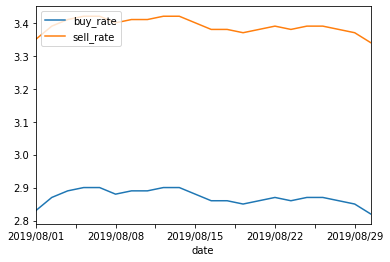


紐元(NZD)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     19.95      20.80
2019/08/02     20.02      20.87
2019/08/05     20.11      20.96
2019/08/06     20.13      20.98
2019/08/07     19.71      20.56
2019/08/08     19.76      20.61
2019/08/09     19.86      20.71
2019/08/12     19.80      20.65
2019/08/13     19.82      20.67
2019/08/14     19.79      20.64
2019/08/15     19.73      20.58
2019/08/16     19.69      20.54
2019/08/19     19.65      20.50
2019/08/20     19.65      20.50
2019/08/21     19.60      20.45
2019/08/22     19.57      20.42
2019/08/23     19.55      20.40
2019/08/26     19.53      20.38
2019/08/27     19.53      20.38
2019/08/28     19.45      20.30
2019/08/29     19.42      20.27
2019/08/30     19.30      20.15


<Figure size 720x576 with 0 Axes>

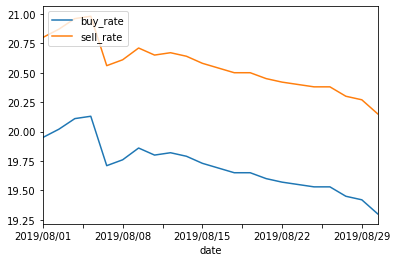


泰幣(THB)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01    0.8859     1.0739
2019/08/02    0.8970     1.0850
2019/08/05    0.9030     1.0910
2019/08/06    0.9006     1.0886
2019/08/07    0.8971     1.0851
2019/08/08    0.8962     1.0842
2019/08/09    0.8967     1.0847
2019/08/12    0.8943     1.0823
2019/08/13    0.8982     1.0862
2019/08/14    0.8953     1.0833
2019/08/15    0.8922     1.0802
2019/08/16    0.8921     1.0801
2019/08/19    0.8917     1.0797
2019/08/20    0.8952     1.0832
2019/08/21    0.8950     1.0830
2019/08/22    0.8957     1.0837
2019/08/23    0.8972     1.0852
2019/08/26    0.9030     1.0910
2019/08/27    0.9033     1.0913
2019/08/28    0.9018     1.0898
2019/08/29    0.9033     1.0913
2019/08/30    0.9015     1.0895


<Figure size 720x576 with 0 Axes>

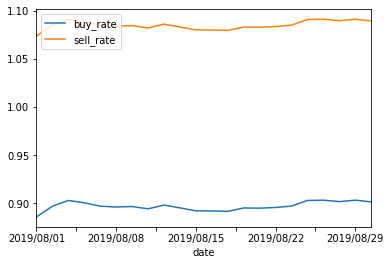


菲國比索(PHP)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01    0.5353     0.6683
2019/08/02    0.5365     0.6695
2019/08/05    0.5372     0.6702
2019/08/06    0.5327     0.6657
2019/08/07    0.5283     0.6613
2019/08/08    0.5278     0.6608
2019/08/09    0.5305     0.6635
2019/08/12    0.5289     0.6619
2019/08/13    0.5270     0.6600
2019/08/14    0.5272     0.6602
2019/08/15    0.5229     0.6559
2019/08/16    0.5245     0.6575
2019/08/19    0.5255     0.6585
2019/08/20    0.5269     0.6599
2019/08/21    0.5265     0.6595
2019/08/22    0.5269     0.6599
2019/08/23    0.5267     0.6597
2019/08/26    0.5254     0.6584
2019/08/27    0.5272     0.6602
2019/08/28    0.5269     0.6599
2019/08/29    0.5287     0.6617
2019/08/30    0.5295     0.6625


<Figure size 720x576 with 0 Axes>

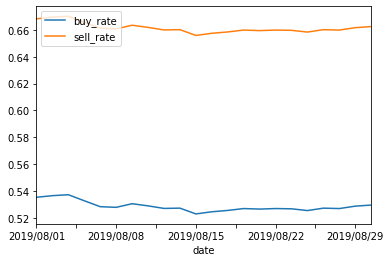


印尼幣(IDR)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01   0.00188    0.00258
2019/08/02   0.00188    0.00258
2019/08/05   0.00188    0.00258
2019/08/06   0.00188    0.00258
2019/08/07   0.00188    0.00258
2019/08/08   0.00188    0.00258
2019/08/09   0.00188    0.00258
2019/08/12   0.00188    0.00258
2019/08/13   0.00188    0.00258
2019/08/14   0.00188    0.00258
2019/08/15   0.00188    0.00258
2019/08/16   0.00188    0.00258
2019/08/19   0.00188    0.00258
2019/08/20   0.00188    0.00258
2019/08/21   0.00188    0.00258
2019/08/22   0.00188    0.00258
2019/08/23   0.00188    0.00258
2019/08/26   0.00188    0.00258
2019/08/27   0.00188    0.00258
2019/08/28   0.00188    0.00258
2019/08/29   0.00188    0.00258
2019/08/30   0.00188    0.00258


<Figure size 720x576 with 0 Axes>

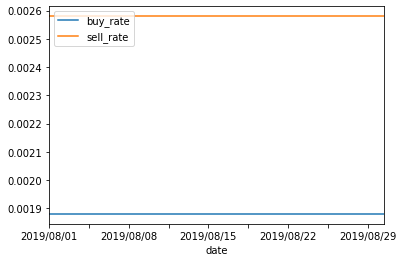


歐元(EUR)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     33.58      34.92
2019/08/02     34.05      35.39
2019/08/05     34.37      35.71
2019/08/06     34.50      35.84
2019/08/07     34.39      35.73
2019/08/08     34.35      35.69
2019/08/09     34.26      35.60
2019/08/12     34.25      35.59
2019/08/13     34.44      35.78
2019/08/14     34.29      35.63
2019/08/15     34.16      35.50
2019/08/16     33.95      35.29
2019/08/19     33.98      35.32
2019/08/20     33.95      35.29
2019/08/21     33.97      35.31
2019/08/22     34.03      35.37
2019/08/23     33.92      35.26
2019/08/26     34.11      35.45
2019/08/27     34.07      35.41
2019/08/28     34.03      35.37
2019/08/29     34.01      35.35
2019/08/30     33.83      35.17


<Figure size 720x576 with 0 Axes>

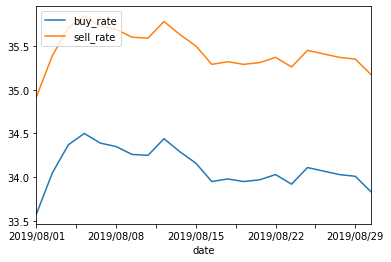


韓元(KRW)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01   0.02447    0.02837
2019/08/02   0.02441    0.02831
2019/08/05   0.02432    0.02822
2019/08/06   0.02418    0.02808
2019/08/07   0.02416    0.02806
2019/08/08   0.02419    0.02809
2019/08/09   0.02416    0.02806
2019/08/12   0.02403    0.02793
2019/08/13   0.02401    0.02791
2019/08/14   0.02416    0.02806
2019/08/15   0.02408    0.02798
2019/08/16   0.02416    0.02806
2019/08/19   0.02416    0.02806
2019/08/20   0.02425    0.02815
2019/08/21   0.02433    0.02823
2019/08/22   0.02427    0.02817
2019/08/23   0.02417    0.02807
2019/08/26   0.02411    0.02801
2019/08/27   0.02416    0.02806
2019/08/28   0.02414    0.02804
2019/08/29   0.02417    0.02807
2019/08/30   0.02424    0.02814


<Figure size 720x576 with 0 Axes>

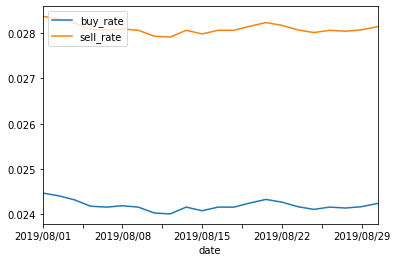


越南盾(VND)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01   0.00097    0.00147
2019/08/02   0.00098    0.00148
2019/08/05   0.00099    0.00149
2019/08/06   0.00098    0.00148
2019/08/07   0.00099    0.00149
2019/08/08   0.00098    0.00148
2019/08/09   0.00098    0.00148
2019/08/12   0.00098    0.00148
2019/08/13   0.00099    0.00149
2019/08/14   0.00098    0.00148
2019/08/15   0.00098    0.00148
2019/08/16   0.00098    0.00148
2019/08/19   0.00098    0.00148
2019/08/20   0.00098    0.00148
2019/08/21   0.00098    0.00148
2019/08/22   0.00098    0.00148
2019/08/23   0.00098    0.00148
2019/08/26   0.00098    0.00148
2019/08/27   0.00098    0.00148
2019/08/28   0.00098    0.00148
2019/08/29   0.00098    0.00148
2019/08/30   0.00098    0.00148


<Figure size 720x576 with 0 Axes>

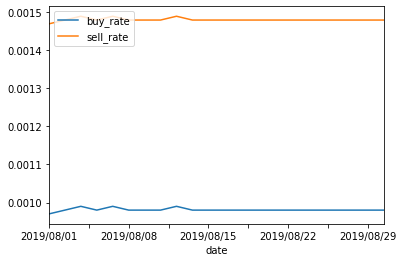


馬來幣(MYR)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     6.405      8.049
2019/08/02     6.435      8.079
2019/08/05     6.454      8.098
2019/08/06     6.407      8.051
2019/08/07     6.404      8.048
2019/08/08     6.384      8.028
2019/08/09     6.381      8.025
2019/08/12     6.390      8.034
2019/08/13     6.393      8.037
2019/08/14     6.389      8.033
2019/08/15     6.368      8.012
2019/08/16     6.388      8.032
2019/08/19     6.395      8.039
2019/08/20     6.393      8.037
2019/08/21     6.393      8.037
2019/08/22     6.392      8.036
2019/08/23     6.372      8.016
2019/08/26     6.360      8.004
2019/08/27     6.349      7.993
2019/08/28     6.345      7.989
2019/08/29     6.325      7.969
2019/08/30     6.326      7.970


<Figure size 720x576 with 0 Axes>

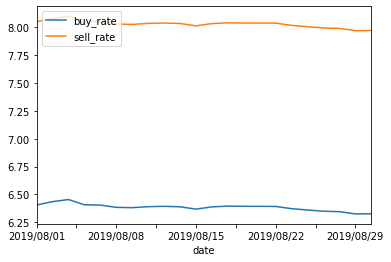


人民幣(CNY)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


            buy_rate  sell_rate
date                           
2019/08/01     4.413      4.575
2019/08/02     4.408      4.570
2019/08/05     4.372      4.534
2019/08/06     4.357      4.519
2019/08/07     4.352      4.514
2019/08/08     4.339      4.501
2019/08/09     4.332      4.494
2019/08/12     4.325      4.487
2019/08/13     4.338      4.500
2019/08/14     4.367      4.529
2019/08/15     4.357      4.519
2019/08/16     4.347      4.509
2019/08/19     4.344      4.506
2019/08/20     4.341      4.503
2019/08/21     4.342      4.504
2019/08/22     4.331      4.493
2019/08/23     4.326      4.488
2019/08/26     4.289      4.451
2019/08/27     4.280      4.442
2019/08/28     4.283      4.445
2019/08/29     4.292      4.454
2019/08/30     4.298      4.460


<Figure size 720x576 with 0 Axes>

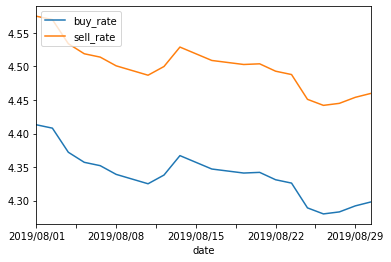

In [23]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url, verify=False)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for rate in rate_table:
    # 擷取匯率表格，把各貨幣資料擷取出來，查詢其歷史匯率
    currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類

    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = rate.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

    #
    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/2019-08")
    resp = requests.get(quote_history_url, verify=False)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    print(HistoryExchangeRate)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()